# Borrower reliability research

**Purpose of the study**

It is necessary to understand how different characteristics of the client affect the fact of repaying the loan on time.
The results of the study will be taken into account when constructing a credit scoring model - a special system that assesses the ability of a potential borrower to repay the loan to the bank.

**Customer**

Bank credit department.

**Questions to answer:**

* Is there a relationship between the number of children and repayment of the loan on time?
* Is there a relationship between marital status and repayment of the loan on time?
* Is there a relationship between income level and loan repayment on time?
* How do different purposes of a loan affect its repayment on time?

**Progress of the study**

Input data from the bank - statistics on the solvency of clients, file data.csv.
Nothing is known about the quality of the data. Therefore, a review of the data will be needed before testing hypotheses.

We will check the data for errors and evaluate their impact on the study. Then, at the preprocessing stage, we will look for an opportunity to correct the most critical errors.

Thus, the research will take place in three stages:

* Review of data.
* Data preprocessing.
* Answers on questions.

## Step 1: Data Review

In [1]:
import pandas as pd   
import seaborn as sns    
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('data.csv')

In [3]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


So, the table has twelve columns. The data type of all columns is object, float and int.

According to the data documentation:

* children — number of children in the family;
* days_employed — total length of service in days;
* dob_years — client age in years;
* education — client’s education level;
* education_id — education level identifier;
* family_status — marital status;
* family_status_id — marital status identifier;
* gender—client gender;
* income_type — employment type;
* debt - whether there was a debt to repay loans;
* total_income - monthly income;
* purpose — purpose of obtaining a loan;

The number of values in the columns varies. This means there are missing values in the data.

In [5]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


## Conclusions

Each row of the table contains information about the borrower. It can be tentatively stated that there is enough information to answer the questions.

But there are gaps in the data, replacement artifacts (for example, a negative number of days of service), duplicates are possible, and most likely, a change in the format in the columns will be required for convenience.

Let's start preprocessing the data.

## Step 2. Data preprocessing
We will remove duplicates, eliminate gaps, bring the data in the columns to a single style, and optimize the data in the table by categorization.

## Removing duplicates
Let's check the dataframe for obvious duplicates and get rid of them.

In [6]:
df.duplicated().sum()

54

In [7]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

To do this, we will display each column and visually evaluate its values for uniqueness
It is possible that changes will have to be made if errors are critical and may affect the result of the study.

In [8]:
df['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

I assume that the information could have been compiled from different databases, where the expected options to choose from (when filling out the questionnaire) are written in different styles.

Let's convert all values ​​to lower case.

In [9]:
df['education'] = df['education'].str.lower()
df['education'].value_counts() 

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [10]:
df['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [11]:
df['family_status'] = df['family_status'].str.lower()

In [12]:
df['income_type'].value_counts() 

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [13]:
df['gender'].value_counts() 

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [14]:
df['purpose'].value_counts() 

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

## Categorization of loan purposes
As we noted above, the data in the purpose column needs categorization: there are only four objective reasons for obtaining a loan.

This:

* car operations,
* real estate transactions,
* holding a wedding,
* getting an education.
Let's create a new column purpose_category, to which we will add the categories listed above. The data in the old purpose column will no longer be needed after this and can be deleted.

In [15]:
def purposes(reason):    
    if 'образ' in reason:
        return 'получение образования'
    if 'свадь' in reason:
        return 'проведение свадьбы'
    if 'авто' in reason:
        return 'операции с автомобилем'
    return 'операции с недвижимостью'

In [16]:
df['purpose_category'] = df['purpose'].apply(purposes) 

## Creation of additional dictionary dataframes, decomposition of the original dataframe
Also, to make the table easier, we create two new dataframes df_education and df_family with columns

* education_id and education - in the first dataframe;
* family_status_id and family_status - in the second dataframe;


In [17]:
df_education = df[['education_id', 'education']].drop_duplicates().reset_index(drop=True)
df_education

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [18]:
df_family = df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)
df_family

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [19]:
df = df.drop(['family_status','education','purpose'], axis=1)

Let's look at our simplified table.

In [20]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,-8437.673028,42,0,0,F,сотрудник,0,253875.639453,операции с недвижимостью
1,1,-4024.803754,36,1,0,F,сотрудник,0,112080.014102,операции с автомобилем
2,0,-5623.422610,33,1,0,M,сотрудник,0,145885.952297,операции с недвижимостью
3,3,-4124.747207,32,1,0,M,сотрудник,0,267628.550329,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,проведение свадьбы


# Check data for anomalies and corrections

In [21]:
df = df.loc[df['gender'] != 'XNA']
df['gender'].value_counts()

F    14189
M     7281
Name: gender, dtype: int64

In [22]:
df['days_employed'] = df['days_employed'].abs()
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616.077870,проведение свадьбы


In [23]:
df[df['days_employed'] >= 24000]['total_income'].count()

3445

In [24]:
df[df['days_employed'] >= 24000]['days_employed'].mean()

365004.30991626816

In [25]:
med_days_employed = df[df['days_employed'] <= 24000]['days_employed'].median()

In [26]:
def fix_days_employed_anomalies(days):  
    if days >= 24000:
        return med_days_employed
    else:
        return days
fix_days_employed_anomalies(10000)

10000

In [27]:
df['days_employed'] = df['days_employed'].apply(fix_days_employed_anomalies) 
df.head()  

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875.639453,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080.014102,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885.952297,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628.550329,получение образования
4,0,1629.997862,53,1,1,F,пенсионер,0,158616.077870,проведение свадьбы


Now let’s check the age of the borrowers: are there any persons under 18 years of age?
If the proportion of such clients is small, then delete them.

In [28]:
df[df['dob_years'] < 18]['dob_years'].count() / df.shape[0] 

0.004704238472286912

The share is small, let's delete the following lines:

In [29]:
df['children'].value_counts()

 0     14106
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

The negative number of children must be corrected to zero.

In [30]:
df['children'] = df['children'].replace(-1, 0)

## Filling in the blanks
Let's check the remaining number of missing values in the data.

In [31]:
df.isna().sum() 

children               0
days_employed       2120
dob_years              0
education_id           0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2120
purpose_category       0
dtype: int64

Empty values ​​in the days_employed column are filled with the previously calculated median length of service (med_days_employed).

In [32]:
df['days_employed'] = df['days_employed'].fillna(med_days_employed)

Empty values ​​in the total_income column will also have to be filled with the median income value, because among the entire sample there may be significant deviations.

In [33]:
med_total_income = df['total_income'].median() 
df['total_income'] = df['total_income'].fillna(med_total_income)

In [34]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose_category    0
dtype: int64

## Changing Data Types
Now let's look at the numeric values in the table.
First, let's cast the float data type in the total_income column with to an integer one.

In [35]:
df['total_income'] = df['total_income'].astype('int')
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,получение образования
4,0,1629.997862,53,1,1,F,пенсионер,0,158616,проведение свадьбы


## Income categorization
The last step of data preprocessing remains: income categorization.

Based on the ranges shown below, let's create a total_income_category column with categories:

* E - 0 – 30,000 rub.;
* D - 30,001 – 50,000 rub.;
* C - 50,001 – 200,000 rub.;
* B - 200,001 – 1,000,000 rub.;
* A - 1,000,001 rub. and higher.

In [36]:
def income_total(incomes):    
    if incomes <= 30000:
        return 'E'
    if incomes <= 50000:
        return 'D'
    if incomes <= 200000:
        return 'C'
    if incomes <=1000000:
        return 'B'
    return 'A'

income_total(150000) 

'C'

In [37]:
df['total_income_category'] = df['total_income'].apply(income_total)

In [38]:
df.head(10) 

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,операции с недвижимостью,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,операции с автомобилем,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,операции с недвижимостью,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,получение образования,B
4,0,1629.997862,53,1,1,F,пенсионер,0,158616,проведение свадьбы,C
5,0,926.185831,27,0,1,M,компаньон,0,255763,операции с недвижимостью,B
6,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с недвижимостью,B
7,0,152.779569,50,1,0,M,сотрудник,0,135823,получение образования,C
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,проведение свадьбы,C
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,операции с недвижимостью,C


## conclusions

Preprocessing found three problems in the data:

* anomalies,
* missing values,
* duplicates - explicit and implicit.
We have categorized the data to make it easier to work with the table.

We replaced missing values ​​in quantitative data with the median.


# Step 3. Answer questions.

## Question 1:
* Is there a relationship between the number of children and repayment of the loan on time?

In [39]:
children_data_pivot = df.pivot_table(index=['children'], columns='debt', values='purpose_category', aggfunc='count')

children_data_pivot =  children_data_pivot.fillna(0)   
children_data_pivot = children_data_pivot.reset_index()    
children_data_pivot['percent'] = (children_data_pivot[1] / (children_data_pivot[1] + children_data_pivot[0])) *100
children_data_pivot[1] = children_data_pivot[1].astype('int')    
children_data_pivot[0] = children_data_pivot[0].astype('int')
children_data_pivot.sort_values('percent')

debt,children,0,1,percent
5,5,9,0,0.000000
0,0,13089,1064,7.517841
3,3,303,27,8.181818
1,1,4365,444,9.232689
2,2,1858,194,9.454191
4,4,37,4,9.756098
6,20,68,8,10.526316


The summary table shows the increase in the percentage of overdue loans depending on the number of children. The percentage is calculated based on the total number of borrowers in each category (0,1,2,3,4,5 children, respectively).

We remind you that:

* 0 - no debt;
* 1 - presence of debt.
Let's try to visualize the table.

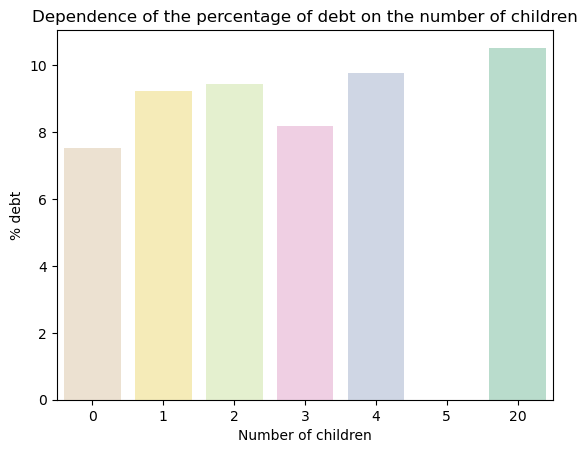

In [40]:
sns.barplot(x='children',y='percent', data = children_data_pivot, palette='Pastel2_r')
plt.title('Dependence of the percentage of debt on the number of children')
plt.xlabel('Number of children')
plt.ylabel('% debt')
plt.show()

## Conclusion 1:
Oddly enough, there is not a single case of loan arrears among borrowers with five children.
But this is a special case, because such a number of children is rare.
The lowest percentage of arrears is among childless borrowers (7.52%), in other groups this proportion is higher by 1-2%.

## Question 2:
* Is there a relationship between marital status and repayment of the loan on time?

In [41]:
family_data_pivot = df.pivot_table(index=['family_status_id'], columns='debt', values='purpose_category', aggfunc='count')
family_data_pivot['percent'] = (family_data_pivot[1] / (family_data_pivot[1] + family_data_pivot[0])) *100
family_data_pivot = family_data_pivot.merge(df_family, on='family_status_id', how='left')
family_data_pivot.sort_values('percent')

,family_status_id,0,1,percent,family_status
2,2,896,63,6.569343,вдовец / вдова
3,3,1110,85,7.112971,в разводе
0,0,11413,931,7.542126,женат / замужем
1,1,3774,388,9.322441,гражданский брак
4,4,2536,274,9.750890,не женат / не замужем


The summary table shows the dependence of the occurrence of loan arrears depending on marital status.

The percentage of overdue payments, which is calculated based on the total number of borrowers in each category, is lower for people who formalized their relationship.

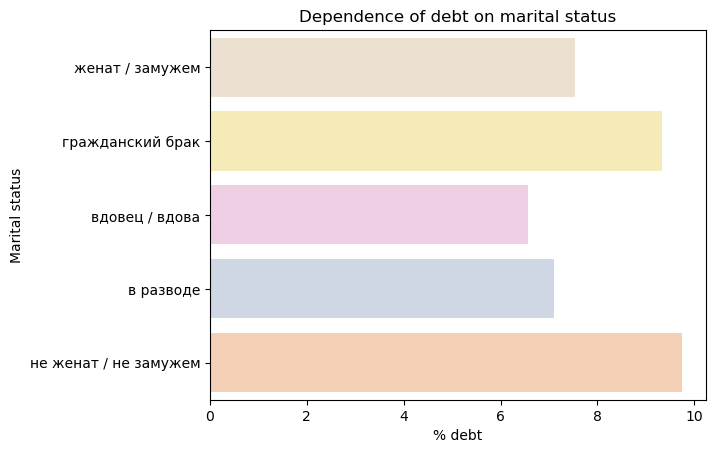

In [42]:
sns.barplot(y='family_status',x='percent',data = family_data_pivot, palette='Pastel2_r')
plt.title('Dependence of debt on marital status')
plt.xlabel('% debt')
plt.ylabel('Marital status')
plt.show()

## Conclusion 2:
The most conscientious borrowers are people who have experience in formalized family relationships (regardless of whether these relationships ended for some reason or not). The number of clients who have not had such experience and who have loan debt is 2-3% higher.

## Question 3:
* Is there a relationship between income level and loan repayment on time?

In [43]:
income_data_pivot = df.pivot_table(index=['total_income_category'], columns='debt', values='gender', aggfunc='count')
income_data_pivot['percent'] = (income_data_pivot[1] / (income_data_pivot[1] + income_data_pivot[0])) *100
income_data_pivot = income_data_pivot.reset_index()
income_data_pivot.sort_values('percent')

debt,total_income_category,0,1,percent
3,D,329,21,6.000000
1,B,4684,356,7.063492
0,A,23,2,8.000000
2,C,14673,1360,8.482505
4,E,20,2,9.090909


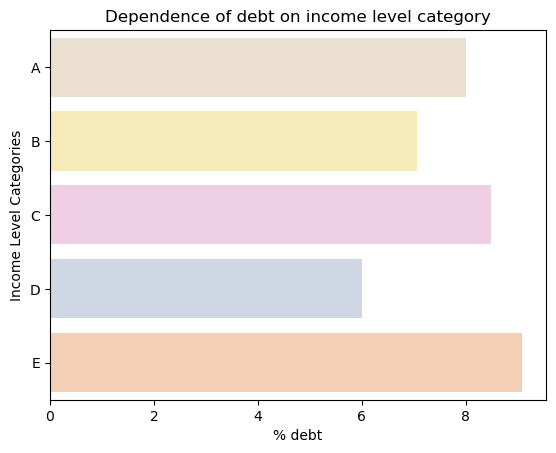

In [44]:
sns.barplot(y='total_income_category',x='percent',data = income_data_pivot, palette='Pastel2_r')
plt.title('Dependence of debt on income level category')
plt.xlabel('% debt')
plt.ylabel('Income Level Categories')
plt.show()

## Conclusion 3:
As can be seen from the table and diagram above, borrowers with an income level of 30,001 - 50,000 rubles primarily try to repay the loan according to the schedule. The overdue percentage for them is the lowest: only 6%.

In the second category there are people with above-average and high income (from 200,001 rubles and above).

The most defaulting borrowers are those with the lowest income (less than 30,000 rubles.)

## Question 4:
* How do different purposes of a loan affect its repayment on time?

In [45]:
purpose_data_pivot = df.pivot_table(index=['purpose_category'], columns='debt', values='gender', aggfunc='count')
purpose_data_pivot['percent'] = (purpose_data_pivot[1] / (purpose_data_pivot[1] + purpose_data_pivot[0])) *100
purpose_data_pivot = purpose_data_pivot.reset_index()    
purpose_data_pivot.sort_values('percent')

debt,purpose_category,0,1,percent
1,операции с недвижимостью,10031,782,7.232036
3,проведение свадьбы,2149,186,7.965739
2,получение образования,3644,370,9.217738
0,операции с автомобилем,3905,403,9.354689


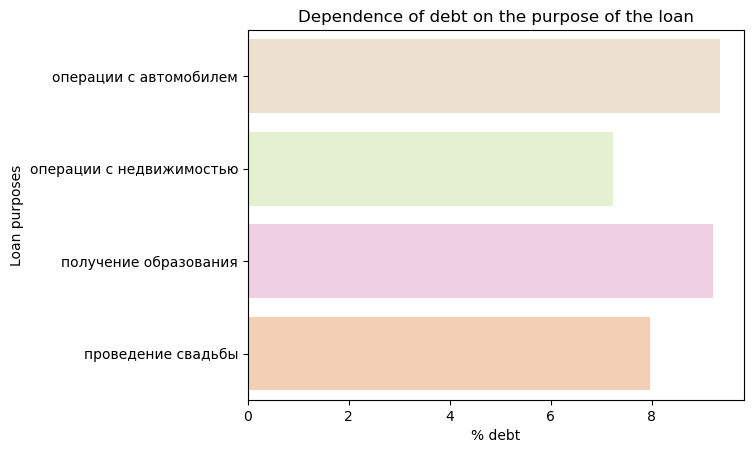

In [46]:
sns.barplot(y='purpose_category',x='percent',data = purpose_data_pivot, palette='Pastel2_r')
plt.title('Dependence of debt on the purpose of the loan')
plt.xlabel('% debt')
plt.ylabel('Loan purposes')
plt.show()

## Conclusion 4:
The most problematic, in terms of repayment, are car loans.

Loans for real estate transactions and education are taken out by the most respectable borrowers.

# General conclusion
Clients without children, with average or above average income, taking out a loan to improve their living conditions or for other real estate transactions are the most reliable part of borrowers;

Clients who are not officially married, but have 2 or more children, with average and low income, who want to spend borrowed funds on buying a car, are most likely to violate contractual obligations and repay the loan on time.